# 1장 인공신경망과 딥러닝

## 텐서플로우를 이용한 구현

In [10]:
import pandas as pd
from sklearn import datasets

iris = datasets.load_iris()
iris_X = iris.data
iris_y = pd.get_dummies(iris.target).to_numpy()

from sklearn.model_selection import train_test_split
train_X, test_X, train_y, test_y = train_test_split(iris_X, iris_y,
test_size=0.3, random_state=1)

In [2]:
import tensorflow.compat.v1 as tf
tf.disable_v2_behavior()

Instructions for updating:
non-resource variables are not supported in the long term


In [3]:
x = tf.placeholder(tf.float32, [None, 4])
y = tf.placeholder(tf.float32, [None, 3])

In [5]:
# 은닉층1
W1 = tf.Variable(tf.zeros([4,50]))
b1 = tf.Variable(tf.zeros([50]))
h1 = tf.nn.sigmoid(tf.matmul(x,W1)+b1)

# 은닉층2
W2 = tf.Variable(tf.zeros([50,30]))
b2 = tf.Variable(tf.zeros([30]))
h2 = tf.nn.sigmoid(tf.matmul(h1,W2)+b2)

# 출력층
W3 = tf.Variable(tf.zeros([30,3]))
b3 = tf.Variable(tf.zeros([3]))
h3 = tf.nn.softmax(tf.matmul(h2,W3)+b3)

In [6]:
cross_entropy = -tf.reduce_sum(y * tf.log(h3),
                              reduction_indices=[1])
loss = tf.reduce_mean(cross_entropy)
train = tf.train.AdamOptimizer().minimize(loss)

In [11]:
init = tf.global_variables_initializer()
sess = tf.Session()
sess.run(init)

for i in range(1000):
    sess.run(train, feed_dict={x: train_X, y: train_y})
    if i % 100 ==0:
        tr_loss = sess.run(loss,
                          feed_dict={x:train_X, y:train_y})
        print('Step %d, %.5f' % (i, tr_loss))

Step 0, 1.09781
Step 100, 1.06112
Step 200, 0.76452
Step 300, 0.66876
Step 400, 0.61382
Step 500, 0.56832
Step 600, 0.52745
Step 700, 0.49120
Step 800, 0.45913
Step 900, 0.39011


In [12]:
correct_prediction = tf.equal(tf.argmax(h3,1),
                             tf.argmax(y,1))
accuracy = tf.reduce_mean(tf.cast(correct_prediction,
                                 tf.float32))
print(sess.run(accuracy, feed_dict={x:test_X, y:test_y}))

0.9777778


## 케라스를 이용한 구현

In [15]:
from tensorflow.keras.models import Sequential
model = Sequential()

from tensorflow.keras.layers import InputLayer, Dense
model.add(InputLayer(4))
model.add(Dense(50, activation='sigmoid'))
model.add(Dense(30, activation='sigmoid'))
model.add(Dense(3, activation='softmax'))

In [16]:
model.compile(optimizer='adam',
             loss= 'categorical_crossentropy',
             metrics=['accuracy'])

In [17]:
model.fit(train_X, train_y, epochs=1000)

Train on 105 samples
Epoch 1/1000
105/105 [==============================] - 0s 418us/sample - loss: 1.3303 - acc: 0.3429
Epoch 2/1000
105/105 [==============================] - 0s 47us/sample - loss: 1.2350 - acc: 0.3429
Epoch 3/1000
105/105 [==============================] - 0s 57us/sample - loss: 1.1766 - acc: 0.3429
Epoch 4/1000
105/105 [==============================] - 0s 63us/sample - loss: 1.1327 - acc: 0.3429
Epoch 5/1000
105/105 [==============================] - 0s 47us/sample - loss: 1.1067 - acc: 0.3429
Epoch 6/1000
105/105 [==============================] - 0s 57us/sample - loss: 1.0851 - acc: 0.5238
Epoch 7/1000
105/105 [==============================] - 0s 38us/sample - loss: 1.0705 - acc: 0.6286
Epoch 8/1000
105/105 [==============================] - 0s 48us/sample - loss: 1.0624 - acc: 0.6095
Epoch 9/1000
105/105 [==============================] - 0s 57us/sample - loss: 1.0565 - acc: 0.5524
Epoch 10/1000
105/105 [==============================] - 0s 57us/sample - loss

Epoch 82/1000
105/105 [==============================] - 0s 38us/sample - loss: 0.4782 - acc: 0.9238
Epoch 83/1000
105/105 [==============================] - 0s 38us/sample - loss: 0.4740 - acc: 0.9143
Epoch 84/1000
105/105 [==============================] - 0s 47us/sample - loss: 0.4698 - acc: 0.8857
Epoch 85/1000
105/105 [==============================] - 0s 38us/sample - loss: 0.4662 - acc: 0.8762
Epoch 86/1000
105/105 [==============================] - 0s 47us/sample - loss: 0.4623 - acc: 0.8762
Epoch 87/1000
105/105 [==============================] - 0s 38us/sample - loss: 0.4585 - acc: 0.8762
Epoch 88/1000
105/105 [==============================] - 0s 38us/sample - loss: 0.4548 - acc: 0.8762
Epoch 89/1000
105/105 [==============================] - 0s 48us/sample - loss: 0.4504 - acc: 0.8952
Epoch 90/1000
105/105 [==============================] - 0s 47us/sample - loss: 0.4468 - acc: 0.9429
Epoch 91/1000
105/105 [==============================] - 0s 38us/sample - loss: 0.4432 - ac

105/105 [==============================] - 0s 38us/sample - loss: 0.1144 - acc: 0.9714
Epoch 243/1000
105/105 [==============================] - 0s 38us/sample - loss: 0.1148 - acc: 0.9714
Epoch 244/1000
105/105 [==============================] - 0s 38us/sample - loss: 0.1201 - acc: 0.9810
Epoch 245/1000
105/105 [==============================] - 0s 38us/sample - loss: 0.1162 - acc: 0.9810
Epoch 246/1000
105/105 [==============================] - 0s 29us/sample - loss: 0.1115 - acc: 0.9714
Epoch 247/1000
105/105 [==============================] - 0s 38us/sample - loss: 0.1180 - acc: 0.9619
Epoch 248/1000
105/105 [==============================] - 0s 38us/sample - loss: 0.1181 - acc: 0.9619
Epoch 249/1000
105/105 [==============================] - 0s 29us/sample - loss: 0.1167 - acc: 0.9619
Epoch 250/1000
105/105 [==============================] - 0s 38us/sample - loss: 0.1129 - acc: 0.9619
Epoch 251/1000
105/105 [==============================] - 0s 38us/sample - loss: 0.1098 - acc: 0.

105/105 [==============================] - 0s 66us/sample - loss: 0.0755 - acc: 0.9714
Epoch 403/1000
105/105 [==============================] - 0s 38us/sample - loss: 0.0751 - acc: 0.9714
Epoch 404/1000
105/105 [==============================] - 0s 38us/sample - loss: 0.0779 - acc: 0.9714
Epoch 405/1000
105/105 [==============================] - 0s 38us/sample - loss: 0.0768 - acc: 0.9714
Epoch 406/1000
105/105 [==============================] - 0s 38us/sample - loss: 0.0757 - acc: 0.9714
Epoch 407/1000
105/105 [==============================] - 0s 48us/sample - loss: 0.0753 - acc: 0.9714
Epoch 408/1000
105/105 [==============================] - 0s 38us/sample - loss: 0.0765 - acc: 0.9714
Epoch 409/1000
105/105 [==============================] - 0s 48us/sample - loss: 0.0760 - acc: 0.9714
Epoch 410/1000
105/105 [==============================] - 0s 47us/sample - loss: 0.0756 - acc: 0.9714
Epoch 411/1000
105/105 [==============================] - 0s 38us/sample - loss: 0.0751 - acc: 0.

105/105 [==============================] - 0s 38us/sample - loss: 0.0662 - acc: 0.9714
Epoch 563/1000
105/105 [==============================] - 0s 38us/sample - loss: 0.0670 - acc: 0.9714
Epoch 564/1000
105/105 [==============================] - 0s 47us/sample - loss: 0.0672 - acc: 0.9714
Epoch 565/1000
105/105 [==============================] - 0s 47us/sample - loss: 0.0673 - acc: 0.9714
Epoch 566/1000
105/105 [==============================] - 0s 47us/sample - loss: 0.0671 - acc: 0.9714
Epoch 567/1000
105/105 [==============================] - 0s 38us/sample - loss: 0.0684 - acc: 0.9714
Epoch 568/1000
105/105 [==============================] - 0s 47us/sample - loss: 0.0665 - acc: 0.9714
Epoch 569/1000
105/105 [==============================] - 0s 47us/sample - loss: 0.0664 - acc: 0.9714
Epoch 570/1000
105/105 [==============================] - 0s 38us/sample - loss: 0.0679 - acc: 0.9619
Epoch 571/1000
105/105 [==============================] - 0s 38us/sample - loss: 0.0673 - acc: 0.

105/105 [==============================] - 0s 47us/sample - loss: 0.0656 - acc: 0.9714
Epoch 723/1000
105/105 [==============================] - 0s 48us/sample - loss: 0.0651 - acc: 0.9810
Epoch 724/1000
105/105 [==============================] - 0s 29us/sample - loss: 0.0632 - acc: 0.9714
Epoch 725/1000
105/105 [==============================] - 0s 38us/sample - loss: 0.0626 - acc: 0.9714
Epoch 726/1000
105/105 [==============================] - 0s 57us/sample - loss: 0.0635 - acc: 0.9714
Epoch 727/1000
105/105 [==============================] - 0s 38us/sample - loss: 0.0636 - acc: 0.9714
Epoch 728/1000
105/105 [==============================] - 0s 47us/sample - loss: 0.0644 - acc: 0.9714
Epoch 729/1000
105/105 [==============================] - 0s 38us/sample - loss: 0.0631 - acc: 0.9714
Epoch 730/1000
105/105 [==============================] - 0s 38us/sample - loss: 0.0626 - acc: 0.9714
Epoch 731/1000
105/105 [==============================] - 0s 57us/sample - loss: 0.0623 - acc: 0.

105/105 [==============================] - 0s 38us/sample - loss: 0.0636 - acc: 0.9714
Epoch 883/1000
105/105 [==============================] - 0s 38us/sample - loss: 0.0602 - acc: 0.9714
Epoch 884/1000
105/105 [==============================] - 0s 38us/sample - loss: 0.0613 - acc: 0.9714
Epoch 885/1000
105/105 [==============================] - 0s 38us/sample - loss: 0.0618 - acc: 0.9714
Epoch 886/1000
105/105 [==============================] - 0s 38us/sample - loss: 0.0617 - acc: 0.9810
Epoch 887/1000
105/105 [==============================] - 0s 38us/sample - loss: 0.0627 - acc: 0.9714
Epoch 888/1000
105/105 [==============================] - 0s 47us/sample - loss: 0.0611 - acc: 0.9714
Epoch 889/1000
105/105 [==============================] - 0s 38us/sample - loss: 0.0607 - acc: 0.9714
Epoch 890/1000
105/105 [==============================] - 0s 38us/sample - loss: 0.0611 - acc: 0.9714
Epoch 891/1000
105/105 [==============================] - 0s 47us/sample - loss: 0.0604 - acc: 0.

In [18]:
model.evaluate(test_X, test_y)

C:\ProgramData\Anaconda3\lib\site-packages\keras\engine\training_v1.py:2057: UserWarning: `Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.
  updates = self.state_updates


[0.015848337962395615, 1.0]

# 케라스를 이용한 딥러닝 구현

## 모델 저장하고 불러오기

In [3]:
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten, Dense, Dropout

In [4]:
(train_X,train_y),(test_X, test_y) = mnist.load_data()
train_X, test_X = train_X/255.0, test_X/255.0

11501568/11490434 [==============================] - 0s 0us/step


In [6]:
model = Sequential()
model.add(Flatten(input_shape=(28,28)))
model.add(Dense(360, activation='relu'))
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(10, activation='softmax'))

model.compile(optimizer='SGD',
             loss='sparse_categorical_crossentropy',
             metrics=['accuracy'])
model.fit(train_X, train_y,
         batch_size=100, epochs=5,
         verbose=1)
model.save('mnist_keras_model.h5')

Epoch 1/5
600/600 [==============================] - 2s 3ms/step - loss: 0.9986 - accuracy: 0.7365
Epoch 2/5
600/600 [==============================] - 2s 3ms/step - loss: 0.4626 - accuracy: 0.8697
Epoch 3/5
600/600 [==============================] - 2s 3ms/step - loss: 0.3787 - accuracy: 0.8911
Epoch 4/5
600/600 [==============================] - 2s 3ms/step - loss: 0.3342 - accuracy: 0.9049
Epoch 5/5
600/600 [==============================] - 2s 3ms/step - loss: 0.3066 - accuracy: 0.9107


In [7]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_1 (Flatten)         (None, 784)               0         
                                                                 
 dense_3 (Dense)             (None, 360)               282600    
                                                                 
 dense_4 (Dense)             (None, 128)               46208     
                                                                 
 dropout_1 (Dropout)         (None, 128)               0         
                                                                 
 dense_5 (Dense)             (None, 10)                1290      
                                                                 
Total params: 330,098
Trainable params: 330,098
Non-trainable params: 0
_________________________________________________________________


### 모델의 구조 저장하기

In [8]:
model_json = model.to_json()

with open('mnist_model.json','w') as f:
    f.write(model_json)

In [9]:
with open('mnist_model.json', 'r') as f:
    model_json = f.read()
    
from tensorflow.keras.models import model_from_json
model = model_from_json(model_json)
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_1 (Flatten)         (None, 784)               0         
                                                                 
 dense_3 (Dense)             (None, 360)               282600    
                                                                 
 dense_4 (Dense)             (None, 128)               46208     
                                                                 
 dropout_1 (Dropout)         (None, 128)               0         
                                                                 
 dense_5 (Dense)             (None, 10)                1290      
                                                                 
Total params: 330,098
Trainable params: 330,098
Non-trainable params: 0
_________________________________________________________________


In [10]:
model.load_weights('mnist_keras_model.h5')

model.compile(optimizer='SGD',
             loss='sparse_categorical_crossentropy',
             metrics=['accuracy'])
model.evaluate(test_X, test_y)

313/313 [==============================] - 1s 1ms/step - loss: 0.2510 - accuracy: 0.9292


[0.25095969438552856, 0.9291999936103821]

### 모델의 구조와 가중치 불러오기

In [11]:
from tensorflow.keras.models import load_model
model = load_model('mnist_keras_model.h5')

In [14]:
from tensorflow.keras.datasets import mnist
import tensorflow as tf
mnist = tf.keras.datasets.mnist
(train_X, train_y), (test_X, test_y) = mnist.load_data()
train_X, test_X = train_X /255.0, test_X /255.0

import numpy as np
pred = np.argmax(model.predict(test_X), axis=1)
np.mean(np.equal(test_y, pred))

0.9292

## 콜백을 이용한 딥러닝 모형 관리 및 모니터링

### ModelCheckPoint, EarlyStopping, Tensorboard

In [18]:
import tensorflow as tf
mnist = tf.keras.datasets.mnist
(train_X, train_y), (test_X,test_y) = mnist.load_data()
train_X, test_y = train_X/255.0, test_X/255.0

from tensorflow.keras.callbacks import ModelCheckpoint
path = 'mnist_keras_model.h5'
checkpoint=ModelCheckpoint(filepath=path,
                          monitor='val_accuracy',
                          save_best_only=True,
                          verbose=1)
from tensorflow.keras.callbacks import EarlyStopping
early_stopping = EarlyStopping(monitor='val_accuracy',
                              patience=3)

from tensorflow.keras.callbacks import TensorBoard
tensor_board = TensorBoard(log_dir='tensor_log',
                          embeddings_freq=1,
                          histogram_freq=1)

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten, Dense, Dropout

model = Sequential()
model.add(Flatten(input_shape=(28,28)))
model.add(Dense(360,activation='relu'))
model.add(Dense(128,activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(10, activation='softmax'))

model.compile(optimizer='SGD', loss='sparse_categorical_crossentropy',
             metrics=['accuracy'])

model.fit(train_X, train_y, validation_split=0.2,
         batch_size=1000, epochs=1000,
         callbacks=[checkpoint, early_stopping, tensor_board])

Epoch 1/1000
45/48 [===========================>..] - ETA: 0s - loss: 2.1964 - accuracy: 0.2335
Epoch 00001: val_accuracy improved from -inf to 0.47233, saving model to mnist_keras_model.h5
48/48 [==============================] - 1s 19ms/step - loss: 2.1877 - accuracy: 0.2432 - val_loss: 2.0257 - val_accuracy: 0.4723
Epoch 2/1000
45/48 [===========================>..] - ETA: 0s - loss: 1.9109 - accuracy: 0.4964
Epoch 00002: val_accuracy improved from 0.47233 to 0.68367, saving model to mnist_keras_model.h5
48/48 [==============================] - 1s 16ms/step - loss: 1.9009 - accuracy: 0.5026 - val_loss: 1.7132 - val_accuracy: 0.6837
Epoch 3/1000
47/48 [============================>.] - ETA: 0s - loss: 1.5984 - accuracy: 0.6390
Epoch 00003: val_accuracy improved from 0.68367 to 0.75508, saving model to mnist_keras_model.h5
48/48 [==============================] - 1s 18ms/step - loss: 1.5954 - accuracy: 0.6396 - val_loss: 1.3905 - val_accuracy: 0.7551
Epoch 4/1000
48/48 [==============

48/48 [==============================] - 1s 16ms/step - loss: 0.4095 - accuracy: 0.8845 - val_loss: 0.3331 - val_accuracy: 0.9101
Epoch 27/1000
45/48 [===========================>..] - ETA: 0s - loss: 0.4035 - accuracy: 0.8851
Epoch 00027: val_accuracy improved from 0.91008 to 0.91167, saving model to mnist_keras_model.h5
48/48 [==============================] - 1s 16ms/step - loss: 0.4034 - accuracy: 0.8847 - val_loss: 0.3283 - val_accuracy: 0.9117
Epoch 28/1000
44/48 [==========================>...] - ETA: 0s - loss: 0.3979 - accuracy: 0.8866
Epoch 00028: val_accuracy improved from 0.91167 to 0.91300, saving model to mnist_keras_model.h5
48/48 [==============================] - 1s 17ms/step - loss: 0.3980 - accuracy: 0.8868 - val_loss: 0.3241 - val_accuracy: 0.9130
Epoch 29/1000
44/48 [==========================>...] - ETA: 0s - loss: 0.3897 - accuracy: 0.8893
Epoch 00029: val_accuracy improved from 0.91300 to 0.91425, saving model to mnist_keras_model.h5
48/48 [=====================

Epoch 52/1000
46/48 [===========================>..] - ETA: 0s - loss: 0.3149 - accuracy: 0.9093
Epoch 00052: val_accuracy improved from 0.92542 to 0.92608, saving model to mnist_keras_model.h5
48/48 [==============================] - 1s 15ms/step - loss: 0.3149 - accuracy: 0.9092 - val_loss: 0.2612 - val_accuracy: 0.9261
Epoch 53/1000
46/48 [===========================>..] - ETA: 0s - loss: 0.3126 - accuracy: 0.9106
Epoch 00053: val_accuracy improved from 0.92608 to 0.92675, saving model to mnist_keras_model.h5
48/48 [==============================] - 1s 16ms/step - loss: 0.3114 - accuracy: 0.9109 - val_loss: 0.2594 - val_accuracy: 0.9268
Epoch 54/1000
46/48 [===========================>..] - ETA: 0s - loss: 0.3104 - accuracy: 0.9129
Epoch 00054: val_accuracy improved from 0.92675 to 0.92733, saving model to mnist_keras_model.h5
48/48 [==============================] - 1s 16ms/step - loss: 0.3104 - accuracy: 0.9128 - val_loss: 0.2578 - val_accuracy: 0.9273
Epoch 55/1000
45/48 [=======

Epoch 78/1000
46/48 [===========================>..] - ETA: 0s - loss: 0.2654 - accuracy: 0.9245
Epoch 00078: val_accuracy improved from 0.93533 to 0.93558, saving model to mnist_keras_model.h5
48/48 [==============================] - 1s 15ms/step - loss: 0.2659 - accuracy: 0.9243 - val_loss: 0.2254 - val_accuracy: 0.9356
Epoch 79/1000
46/48 [===========================>..] - ETA: 0s - loss: 0.2657 - accuracy: 0.9242
Epoch 00079: val_accuracy improved from 0.93558 to 0.93592, saving model to mnist_keras_model.h5
48/48 [==============================] - 1s 16ms/step - loss: 0.2649 - accuracy: 0.9245 - val_loss: 0.2243 - val_accuracy: 0.9359
Epoch 80/1000
46/48 [===========================>..] - ETA: 0s - loss: 0.2644 - accuracy: 0.9247
Epoch 00080: val_accuracy improved from 0.93592 to 0.93642, saving model to mnist_keras_model.h5
48/48 [==============================] - 1s 15ms/step - loss: 0.2642 - accuracy: 0.9248 - val_loss: 0.2233 - val_accuracy: 0.9364
Epoch 81/1000
46/48 [=======

46/48 [===========================>..] - ETA: 0s - loss: 0.2359 - accuracy: 0.9314
Epoch 00104: val_accuracy improved from 0.94408 to 0.94450, saving model to mnist_keras_model.h5
48/48 [==============================] - 1s 15ms/step - loss: 0.2357 - accuracy: 0.9316 - val_loss: 0.2012 - val_accuracy: 0.9445
Epoch 105/1000
46/48 [===========================>..] - ETA: 0s - loss: 0.2320 - accuracy: 0.9333
Epoch 00105: val_accuracy improved from 0.94450 to 0.94467, saving model to mnist_keras_model.h5
48/48 [==============================] - 1s 15ms/step - loss: 0.2331 - accuracy: 0.9330 - val_loss: 0.2003 - val_accuracy: 0.9447
Epoch 106/1000
46/48 [===========================>..] - ETA: 0s - loss: 0.2305 - accuracy: 0.9338
Epoch 00106: val_accuracy improved from 0.94467 to 0.94492, saving model to mnist_keras_model.h5
48/48 [==============================] - 1s 15ms/step - loss: 0.2324 - accuracy: 0.9329 - val_loss: 0.1996 - val_accuracy: 0.9449
Epoch 107/1000
45/48 [==================

## 케라스를 이용한 와인데이터 분류용 DNN 구현

In [20]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, Dropout
import numpy as np
import pandas as pd

In [21]:
redwine = pd.read_csv('winequality-red.csv', sep=';')
redwine_X = redwine.iloc[:,:-1]
redwine_y = redwine.iloc[:,-1] - 3

In [22]:
from sklearn.model_selection import train_test_split
train_X, test_X, train_y, test_y = train_test_split(
redwine_X, redwine_y, test_size=0.3)

In [23]:
model = Sequential()
model.add(Dense(100, input_shape=(11,), activation='sigmoid'))
model.add(Dropout(0.2))
model.add(Dense(200, activation='relu'))
model.add(Dropout(0.4))
model.add(Dense(50, activation='tanh'))
model.add(Dropout(0.1))
model.add(Dense(6, activation='softmax'))

model.compile(optimizer='adam',
             loss='sparse_categorical_crossentropy',
             metrics=['accuracy'])
history= model.fit(train_X, train_y.to_numpy(),
                  batch_size=200, epochs=300)

Epoch 1/300
6/6 [==============================] - 0s 4ms/step - loss: 1.5124 - accuracy: 0.3289
Epoch 2/300
6/6 [==============================] - 0s 4ms/step - loss: 1.2692 - accuracy: 0.4504
Epoch 3/300
6/6 [==============================] - 0s 4ms/step - loss: 1.2086 - accuracy: 0.4531
Epoch 4/300
6/6 [==============================] - 0s 4ms/step - loss: 1.1795 - accuracy: 0.4629
Epoch 5/300
6/6 [==============================] - 0s 3ms/step - loss: 1.1921 - accuracy: 0.4647
Epoch 6/300
6/6 [==============================] - 0s 3ms/step - loss: 1.1560 - accuracy: 0.5004
Epoch 7/300
6/6 [==============================] - 0s 3ms/step - loss: 1.1549 - accuracy: 0.4790
Epoch 8/300
6/6 [==============================] - 0s 3ms/step - loss: 1.1546 - accuracy: 0.4960
Epoch 9/300
6/6 [==============================] - 0s 3ms/step - loss: 1.1455 - accuracy: 0.4987
Epoch 10/300
6/6 [==============================] - 0s 3ms/step - loss: 1.1231 - accuracy: 0.4853
Epoch 11/300
6/6 [===========

6/6 [==============================] - 0s 3ms/step - loss: 0.9828 - accuracy: 0.5684
Epoch 85/300
6/6 [==============================] - 0s 3ms/step - loss: 0.9938 - accuracy: 0.5505
Epoch 86/300
6/6 [==============================] - 0s 3ms/step - loss: 1.0071 - accuracy: 0.5666
Epoch 87/300
6/6 [==============================] - 0s 3ms/step - loss: 1.0027 - accuracy: 0.5675
Epoch 88/300
6/6 [==============================] - 0s 3ms/step - loss: 0.9993 - accuracy: 0.5585
Epoch 89/300
6/6 [==============================] - 0s 3ms/step - loss: 0.9956 - accuracy: 0.5800
Epoch 90/300
6/6 [==============================] - 0s 3ms/step - loss: 0.9889 - accuracy: 0.5702
Epoch 91/300
6/6 [==============================] - 0s 3ms/step - loss: 1.0029 - accuracy: 0.5559
Epoch 92/300
6/6 [==============================] - 0s 3ms/step - loss: 0.9982 - accuracy: 0.5559
Epoch 93/300
6/6 [==============================] - 0s 2ms/step - loss: 0.9825 - accuracy: 0.5710
Epoch 94/300
6/6 [===============

6/6 [==============================] - 0s 3ms/step - loss: 0.9607 - accuracy: 0.5684
Epoch 168/300
6/6 [==============================] - 0s 3ms/step - loss: 0.9508 - accuracy: 0.5925
Epoch 169/300
6/6 [==============================] - 0s 3ms/step - loss: 0.9403 - accuracy: 0.5853
Epoch 170/300
6/6 [==============================] - 0s 3ms/step - loss: 0.9478 - accuracy: 0.5853
Epoch 171/300
6/6 [==============================] - 0s 3ms/step - loss: 0.9399 - accuracy: 0.5862
Epoch 172/300
6/6 [==============================] - 0s 3ms/step - loss: 0.9287 - accuracy: 0.5943
Epoch 173/300
6/6 [==============================] - 0s 3ms/step - loss: 0.9395 - accuracy: 0.6005
Epoch 174/300
6/6 [==============================] - 0s 3ms/step - loss: 0.9320 - accuracy: 0.5970
Epoch 175/300
6/6 [==============================] - 0s 3ms/step - loss: 0.9272 - accuracy: 0.5871
Epoch 176/300
6/6 [==============================] - 0s 3ms/step - loss: 0.9423 - accuracy: 0.5827
Epoch 177/300
6/6 [=====

6/6 [==============================] - 0s 3ms/step - loss: 0.9044 - accuracy: 0.6032
Epoch 250/300
6/6 [==============================] - 0s 3ms/step - loss: 0.8986 - accuracy: 0.6130
Epoch 251/300
6/6 [==============================] - 0s 3ms/step - loss: 0.9032 - accuracy: 0.6041
Epoch 252/300
6/6 [==============================] - 0s 3ms/step - loss: 0.9098 - accuracy: 0.6193
Epoch 253/300
6/6 [==============================] - 0s 3ms/step - loss: 0.9194 - accuracy: 0.5880
Epoch 254/300
6/6 [==============================] - 0s 3ms/step - loss: 0.9064 - accuracy: 0.5845
Epoch 255/300
6/6 [==============================] - 0s 2ms/step - loss: 0.8985 - accuracy: 0.5916
Epoch 256/300
6/6 [==============================] - 0s 3ms/step - loss: 0.9006 - accuracy: 0.5934
Epoch 257/300
6/6 [==============================] - 0s 3ms/step - loss: 0.8987 - accuracy: 0.5952
Epoch 258/300
6/6 [==============================] - 0s 3ms/step - loss: 0.9119 - accuracy: 0.6023
Epoch 259/300
6/6 [=====

In [25]:
model.evaluate(test_X, test_y)

15/15 [==============================] - 0s 1ms/step - loss: 1.0030 - accuracy: 0.5562


[1.0029702186584473, 0.5562499761581421]

### 학습 과정 시각화

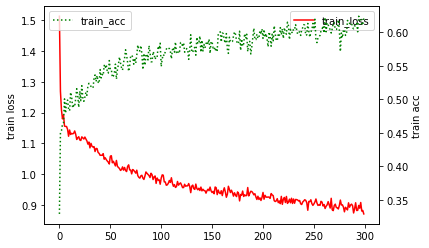

In [27]:
import matplotlib.pyplot as plt
fig, ax1 = plt.subplots(figsize=(6,4))
ax1.plot(history.history['loss'],'r-',label='train_loss')
ax1.set_ylabel('train loss')
ax1.legend()

ax2=ax1.twinx()
ax2.plot(history.history['accuracy'], 'g:', label='train_acc')
ax2.set_ylabel('train acc')
ax2.legend()
plt.show()